ECG Classification as following:

*   N: Non-Ectopic Beats
*   S: Superventrical Ectopic Beats
*   V: Ventricular Ectopic Beats
*   F: Fusion Beats
*   Q: Unknown Beats





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras import Sequential,utils
from keras.layers import Flatten, Dense, Conv1D,  MaxPool1D, Dropout

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('mitbih_train.csv', header=None)
test_df = pd.read_csv('mitbih_test.csv', header= None)

In [ ]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
null_columns = []

for i in train_df.columns:
  print(i, "\t-\t", train_df[i].isna().mean()*100)
  if train_df[i].isna().mean()*100 > 0:
    null_columns.append(i)

0 	-	 0.0
1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0
74 	-	 0.0
75 	-	 0.0
76 	-	 0.0
77 	-	 0.0
78 	-	 0.0
79 	-	 0.0
80 	-	 0.0
81 	-	 0.0
82 	-	 0.0
83 	-	 0.0
84 	-	 0.0
85 	-	 0.0
86 	-	 0.0
87 	-	 0.0
88 	-	 0.0
89 	-	 0.0
90 	-	 0.0
91 	-	 0.

<Axes: xlabel='187', ylabel='count'>

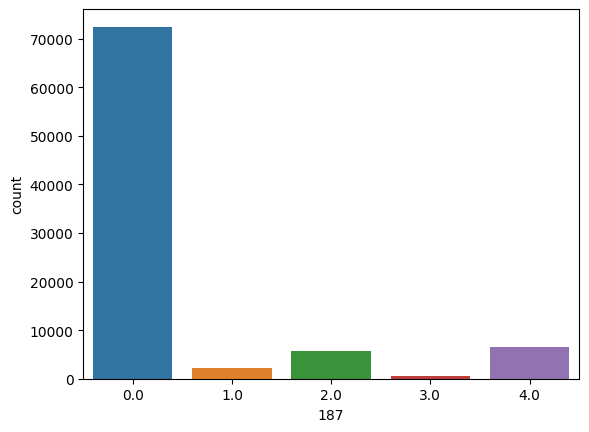

In [ ]:
sns.countplot( x=187, data= train_df)

Since there is a major imbalance in data, we are going to undersample it to that all the classes will be equally balanced. All classes need to be equally balanced out. This removes random smaples from the majority class.

In [ ]:
c0 = train_df[train_df[187] == 0.0].sample(n= 7000)
c1 = train_df[train_df[187] == 1.0]
c2 = train_df[train_df[187] == 2.0]
c3 = train_df[train_df[187] == 3.0]
c4 = train_df[train_df[187] == 4.0]


In [ ]:
train_df_new = pd.concat([c0, c1, c2, c3, c4])
train_df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
4288,0.985037,0.957606,0.645885,0.269327,0.182045,0.189526,0.132170,0.102244,0.109726,0.114713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38598,1.000000,0.906639,0.670124,0.460581,0.209544,0.070539,0.000000,0.012448,0.016598,0.068465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40475,1.000000,0.850416,0.313019,0.033241,0.033241,0.060942,0.019391,0.008310,0.000000,0.002770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67865,0.982979,0.778723,0.489362,0.200000,0.004255,0.008511,0.068085,0.170213,0.182979,0.212766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32403,1.000000,0.647783,0.118227,0.133005,0.044335,0.000000,0.034483,0.044335,0.073892,0.165025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='187', ylabel='count'>

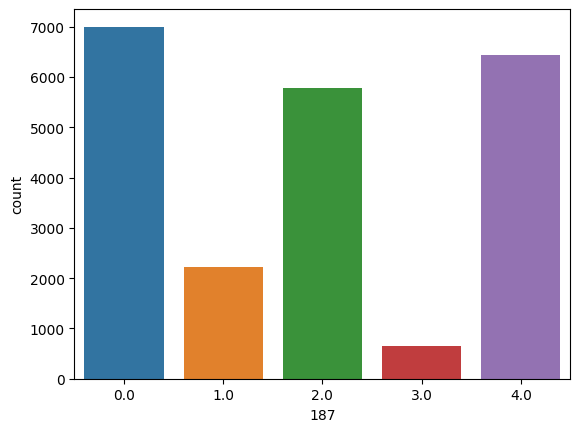

In [ ]:
sns.countplot( x=187, data= train_df_new)

Samples from each class

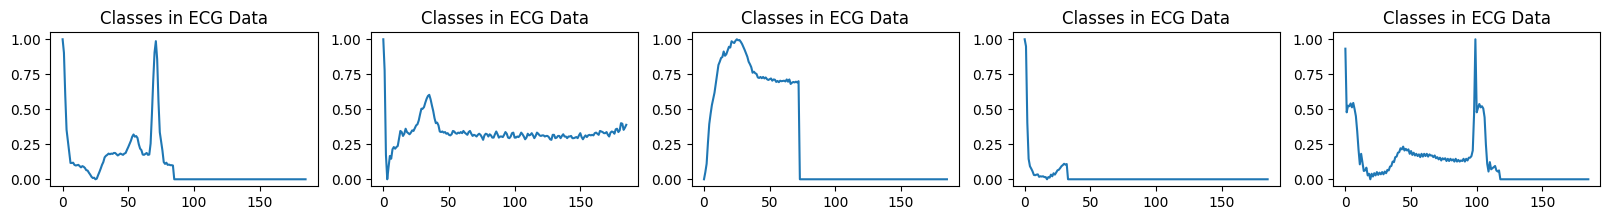

In [ ]:
idx = 0

fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(20,2))

for i in range(5):
  axis[i].plot(train_df[train_df[187] == float(i)].sample(1).iloc[0,:186])
  axis[i].set_title('Classes in ECG Data')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df_new.drop([187], axis =1), train_df_new[187], test_size=0.1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
cnn_mod = Sequential()

cnn_mod.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1], 1)))
cnn_mod.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnn_mod.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))
cnn_mod.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_mod.add(Dropout(0.5))
cnn_mod.add(Flatten())
cnn_mod.add(Dense(units=512, activation='relu'))
cnn_mod.add(Dense(units=1024, activation='relu'))
cnn_mod.add(Dense(units=5, activation='softmax'))

In [ ]:
cnn_mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn_mod.fit(X_train, y_train, epochs=10)

Epoch 1/10
622/622 [==============================] - 60s 94ms/step - loss: 0.3964 - accuracy: 0.8609
Epoch 2/10
622/622 [==============================] - 59s 94ms/step - loss: 0.2067 - accuracy: 0.9291
Epoch 3/10
622/622 [==============================] - 57s 92ms/step - loss: 0.1547 - accuracy: 0.9468
Epoch 4/10
622/622 [==============================] - 58s 93ms/step - loss: 0.1284 - accuracy: 0.9559
Epoch 5/10
622/622 [==============================] - 59s 95ms/step - loss: 0.1021 - accuracy: 0.9639
Epoch 6/10
622/622 [==============================] - 58s 93ms/step - loss: 0.0877 - accuracy: 0.9688
Epoch 7/10
622/622 [==============================] - 58s 93ms/step - loss: 0.0718 - accuracy: 0.9741
Epoch 8/10
622/622 [==============================] - 58s 93ms/step - loss: 0.0691 - accuracy: 0.9750
Epoch 9/10
622/622 [==============================] - 56s 90ms/step - loss: 0.0582 - accuracy: 0.9799
Epoch 10/10
622/622 [==============================] - 59s 94ms/step - loss: 0.054

In [ ]:
cnn_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 187, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1  (None, 94, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 94, 128)           0         
                                                                 
 flatten (Flatten)           (None, 12032)             0         
                                                        

In [ ]:
y_pred = cnn_mod.predict(X_test)
y_lbl = [np.where(i== np.max(i))[0][0] for i in y_pred]
print("Accuracy: {}".format(metrics.accuracy_score(y_lbl, y_test)))

70/70 [==============================] - 2s 28ms/step
Accuracy: 0.958804889090086


In [ ]:
final_test_X = test_df.drop([187], axis=1)
final_test_y = test_df[187]

final_test_X = np.array(final_test_X).reshape(final_test_X.shape[0], final_test_X.shape[1], 1)

In [ ]:
final_pred = cnn_mod(final_test_X)
y_lbl_final = [np.where(i== np.max(i))[0][0] for i in final_pred]
print("Accuracy: {}".format(metrics.accuracy_score(y_lbl_final, final_test_y)))

Accuracy: 0.9659693038552896


CNN + LSTM

In [ ]:
train_x = np.array(train_df[train_df.columns[0:-1]], dtype=np.float32)
train_y = np.array(train_df[train_df.columns[-1:]], dtype=np.float32)

test_x = np.array(test_df[test_df.columns[0:-1]], dtype=np.float32)
test_y = np.array(test_df[test_df.columns[-1:]], dtype=np.float32)

def return_diff_array_table(array, dur):
  for idx in range(array.shape[1]-dur):
    before_col = array[:,idx]
    after_col = array[:,idx+dur]
    new_col = ((after_col - before_col)+1)/2
    new_col = new_col.reshape(-1,1)
    if idx == 0:
      new_table = new_col
    else :
      new_table = np.concatenate((new_table, new_col), axis=1)

  padding_array = np.zeros(shape=(array.shape[0],dur))
  new_table = np.concatenate((padding_array, new_table), axis=1)
  return new_table

def return_merge_diff_table(df, diff_dur):
  fin_table = df.reshape(-1,187,1,1)
  for dur in diff_dur:
    temp_table = return_diff_array_table(df, dur)
    fin_table = np.concatenate((fin_table, temp_table.reshape(-1,187,1,1)), axis=2)
  return fin_table


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)


X_train2 = return_merge_diff_table(df=X_train2, diff_dur=[1])
X_test2 = return_merge_diff_table(df=X_test2, diff_dur=[1])

In [ ]:
input_tensor = tf.keras.Input(shape=(187, 2, 1))
lstmMod = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1), padding='valid')(input_tensor)
lstmMod = tf.keras.layers.BatchNormalization()(lstmMod)
lstmMod = tf.keras.layers.ReLU()(lstmMod)
lstmMod = tf.keras.layers.Dropout(rate=0.5)(lstmMod)
lstmMod = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(lstmMod)
lstmMod = tf.keras.layers.BatchNormalization()(lstmMod)
lstmMod = tf.keras.layers.ReLU()(lstmMod)
lstmMod = tf.keras.layers.Dropout(rate=0.5)(lstmMod)
lstmMod = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(lstmMod)
lstmMod = tf.keras.layers.BatchNormalization()(lstmMod)
lstmMod = tf.keras.layers.ReLU()(lstmMod)
lstmMod = tf.keras.layers.Dropout(rate=0.5)(lstmMod)
lstmMod = tf.keras.layers.Reshape((lstmMod.shape[1], lstmMod.shape[3]))(lstmMod)
lstmMod = tf.keras.layers.LSTM(64)(lstmMod)
lstmMod = tf.keras.layers.Dense(5, activation="softmax")(lstmMod)
FinalMod = tf.keras.Model(inputs = input_tensor, outputs=lstmMod)
FinalMod.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
FinalMod.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 187, 2, 1)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 36, 1, 256)        5376      
                                                                 
 batch_normalization_41 (Ba  (None, 36, 1, 256)        1024      
 tchNormalization)                                               
                                                                 
 re_lu_41 (ReLU)             (None, 36, 1, 256)        0         
                                                                 
 dropout_42 (Dropout)        (None, 36, 1, 256)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 1, 512)        655872    
                                                           

In [ ]:
history2 = FinalMod.fit(X_train2, y_train2, epochs=10)

Epoch 1/10
559/559 [==============================] - 167s 294ms/step - loss: 0.9047 - accuracy: 0.6585
Epoch 2/10
559/559 [==============================] - 164s 294ms/step - loss: 0.4704 - accuracy: 0.8258
Epoch 3/10
559/559 [==============================] - 166s 297ms/step - loss: 0.3646 - accuracy: 0.8698
Epoch 4/10
559/559 [==============================] - 164s 293ms/step - loss: 0.3039 - accuracy: 0.8968
Epoch 5/10
559/559 [==============================] - 165s 295ms/step - loss: 0.2764 - accuracy: 0.9067
Epoch 6/10
559/559 [==============================] - 164s 294ms/step - loss: 0.2559 - accuracy: 0.9155
Epoch 7/10
559/559 [==============================] - 164s 293ms/step - loss: 0.2303 - accuracy: 0.9202
Epoch 8/10
559/559 [==============================] - 164s 294ms/step - loss: 0.2203 - accuracy: 0.9252
Epoch 9/10
559/559 [==============================] - 164s 293ms/step - loss: 0.2048 - accuracy: 0.9323
Epoch 10/10
559/559 [==============================] - 166s 297m

In [ ]:
X_test2 = np.squeeze(X_test2)
X_test2.shape
#X_test2 = tf.squeeze(X_test2)
#y_pred = cnn_mod.predict(X_test2)
#y_lbl = [np.where(i== np.max(i))[0][0] for i in y_pred]
#print("Accuracy: {}".format(metrics.accuracy_score(y_lbl, y_test)))

(1988, 187, 2)